In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [ ]:
import pandas as pd
dataBH = pd.read_excel('Data.xlsx', header=None)

In [ ]:
groceries = dataBH.iloc[[1], [0, 65]]
print(groceries)

          0   65
1  index no.  65


In [ ]:
df = dataBH.iloc[2:,[0,20]]

In [ ]:
df.head()

,0,20
2,2022-08-01 00:00:00,0
3,2022-08-02 00:00:00,1
4,2022-08-03 00:00:00,0
5,2022-08-04 00:00:00,0
6,2022-08-05 00:00:00,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 2 to 185
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       184 non-null    object
 1   20      184 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [ ]:
df.columns = ['ds', 'y']

<Axes: xlabel='ds'>

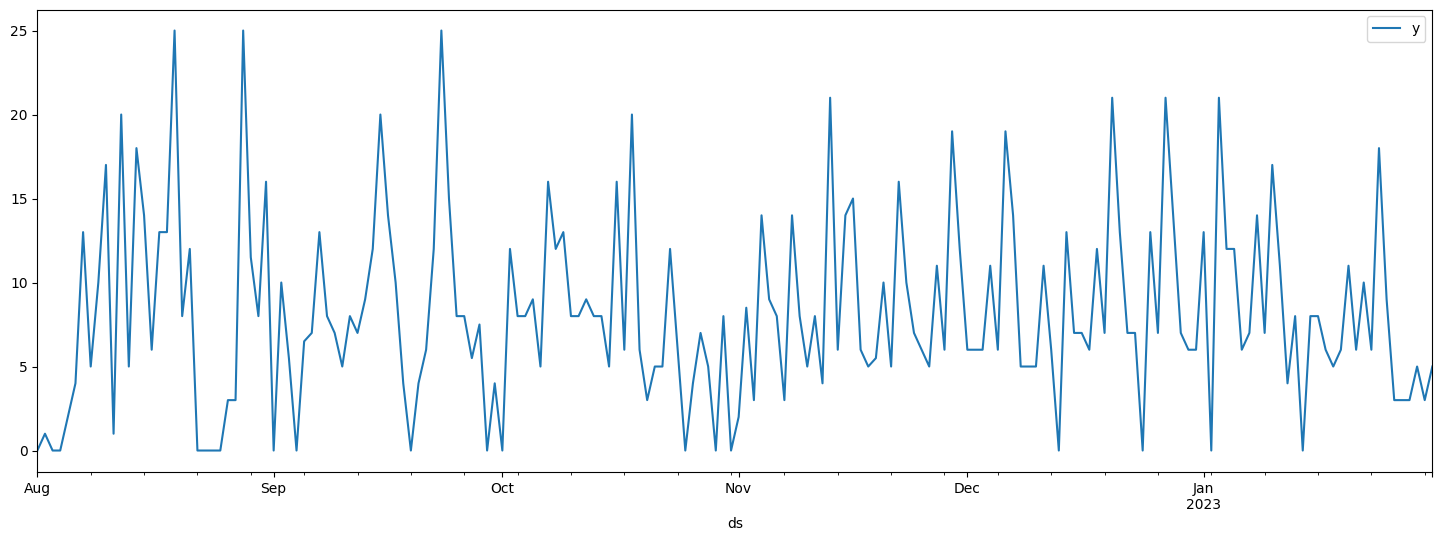

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
len(df)

184

In [ ]:
train = df.iloc[:len(df)-30]
#test = df.iloc[len(df)-30:]
test = df.iloc[:len(df)-30]

In [ ]:
m = Prophet(n_changepoints=1)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(train)
future = m.make_future_dataframe(periods=30) #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsehpwbr4/mu6v3pvn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsehpwbr4/i16oftxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89658', 'data', 'file=/tmp/tmpsehpwbr4/mu6v3pvn.json', 'init=/tmp/tmpsehpwbr4/i16oftxv.json', 'output', 'file=/tmp/tmpsehpwbr4/prophet_modelij387s0s/prophet_model-20230517085117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:51:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:51:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
08:51:17 - cmdstanpy - ERROR - Chain [1]

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
179,2023-01-27,10.867996,4.653101,17.245116
180,2023-01-28,7.492239,0.975721,13.674286
181,2023-01-29,12.911984,6.770708,19.444593
182,2023-01-30,5.331296,-0.950882,11.524053
183,2023-01-31,7.773679,1.433212,13.991920


In [ ]:
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[-30:]['yhat']

In [ ]:
print("Mean Value of Test Dataset:", test['y'].mean())

Mean Value of Test Dataset: 8.308441558441558


In [ ]:
# Extract the yhat column for the last 30 days of the forecast
last_30_days = forecast.iloc[-30:]['yhat']

# Calculate the sum of the predicted values for the last 30 days
predicted_sum = last_30_days.sum()

print("Sum of predicted values for the next 30 days:", predicted_sum)

Sum of predicted values for the next 30 days: 274.89170590142896


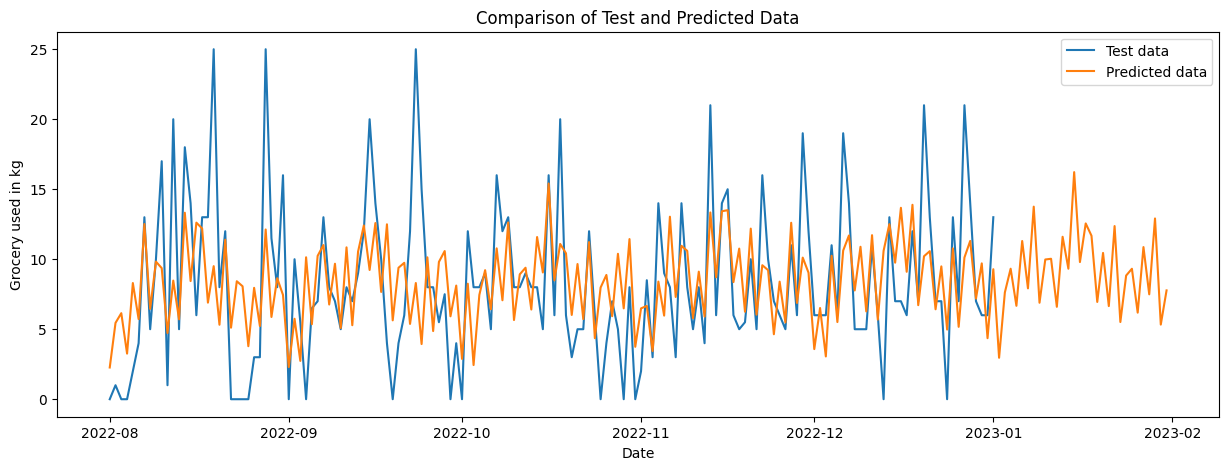

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
# Plot test data
plt.plot(test['ds'], test['y'], label='Test data')

# Plot predicted data
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted data')

# Add title and axis labels
plt.title('Comparison of Test and Predicted Data')
plt.xlabel('Date')
plt.ylabel('Grocery used in kg')

# Show legend
plt.legend()

# Show plot
plt.show()


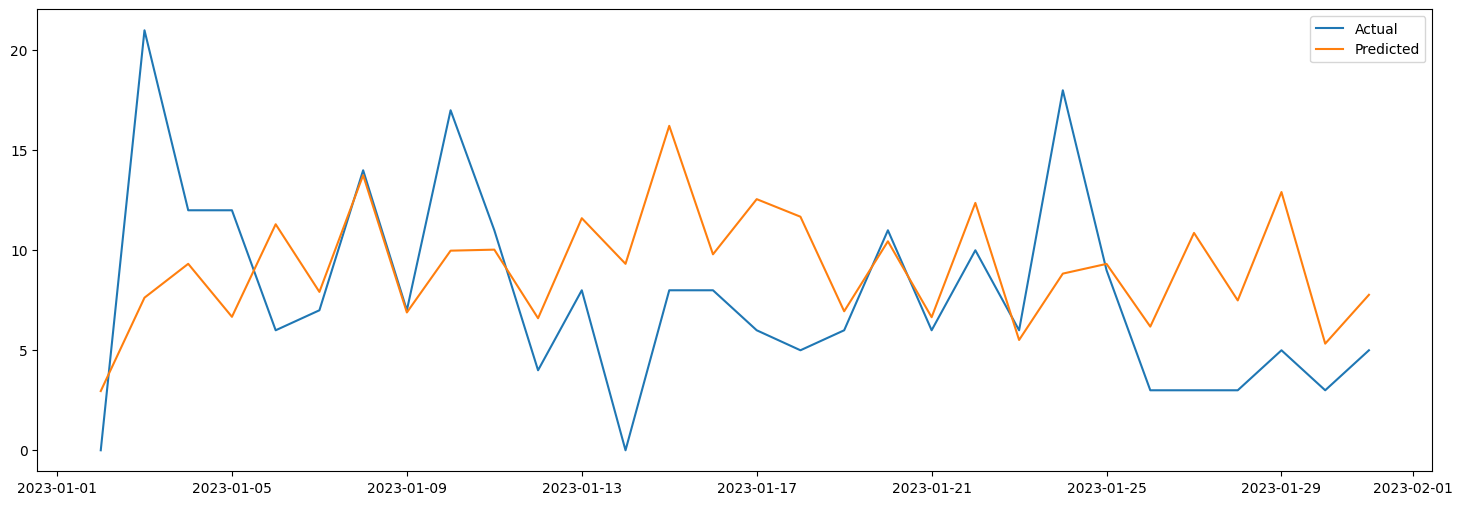

In [ ]:
test = df.iloc[len(df)-30:]
forecast = forecast.iloc[-30:].reset_index(drop=True) # reset index to make it start from 0
plt.figure(figsize=(18,6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.legend()
plt.show()